In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchsummary import summary

In [3]:
from datetime import datetime

current_datetime = datetime.now()
print(current_datetime)


2024-05-04 18:40:12.374252


### 1. Preprocess the MNIST dataset and read the data

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.Resize((224, 224)), 
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [19]:
# Download and load the training data
trainset = datasets.MNIST('./dataset/train', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('./dataset/test', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


# Split the training data into training set and validation set
val_size = int(0.1 * len(trainset))  # 10% for validation set
train_size = len(trainset) - val_size
trainset, valset = random_split(trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('./Desktop/mnist classification/dataset/test', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

##### out of memory - reduce the training set to 1000 samples

In [5]:
# out of memory - cut the training set to 1000 samples
from torch.utils.data import Subset

# Define the number of samples for debugging
num_samples = 500

# Download and load the training data
trainset = datasets.MNIST('./dataset/train', download=False, train=True, transform=transform)
trainset = Subset(trainset, range(num_samples))  # Use only the first num_samples samples
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('./dataset/test', download=False, train=False, transform=transform)
testset = Subset(testset, range(num_samples))  # Use only the first num_samples samples
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Split the training data into training set and validation set
val_size = int(0.1 * len(trainset))  # 10% for validation set
train_size = len(trainset) - val_size
trainset, valset = random_split(trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

#### Dataset website link:  http://yann.lecun.com/exdb/mnist/

### 2. Define the ResNet model

In [7]:
import torch
from torchvision import models

# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        # Load a pre-trained version of ResNet-18
        self.resnet = models.resnet18(pretrained=True)
        # Replace the last fully-connected layer
        # Parameters of newly constructed modules have requires_grad=True by default
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = torch.nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.resnet(x)
        return x

### 3. Model summary

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = ResNet(num_classes=10).to(device)
summary(resnet, (3, 224, 224))



d:\CODING\Anaconda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\CODING\Anaconda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### 4. Train and visulization of the ResNet model

Epoch 1/50 | Training loss: 2.2732553482055664 | Validation loss: 2.3357110023498535 | Training accuracy: 19.77777777777778% | Validation accuracy: 10.0%
Epoch 2/50 | Training loss: 1.8665281385183334 | Validation loss: 2.1596126556396484 | Training accuracy: 33.77777777777778% | Validation accuracy: 22.0%
Epoch 3/50 | Training loss: 1.4501749724149704 | Validation loss: 1.6630803346633911 | Training accuracy: 62.666666666666664% | Validation accuracy: 50.0%
Epoch 4/50 | Training loss: 0.996775433421135 | Validation loss: 1.4468109607696533 | Training accuracy: 83.77777777777777% | Validation accuracy: 56.0%
Epoch 5/50 | Training loss: 0.6704172641038895 | Validation loss: 1.2232016324996948 | Training accuracy: 92.22222222222223% | Validation accuracy: 76.0%
Epoch 6/50 | Training loss: 0.5407003164291382 | Validation loss: 0.9798831939697266 | Training accuracy: 94.0% | Validation accuracy: 74.0%
Epoch 7/50 | Training loss: 0.4172525368630886 | Validation loss: 0.5670850872993469 | Tr

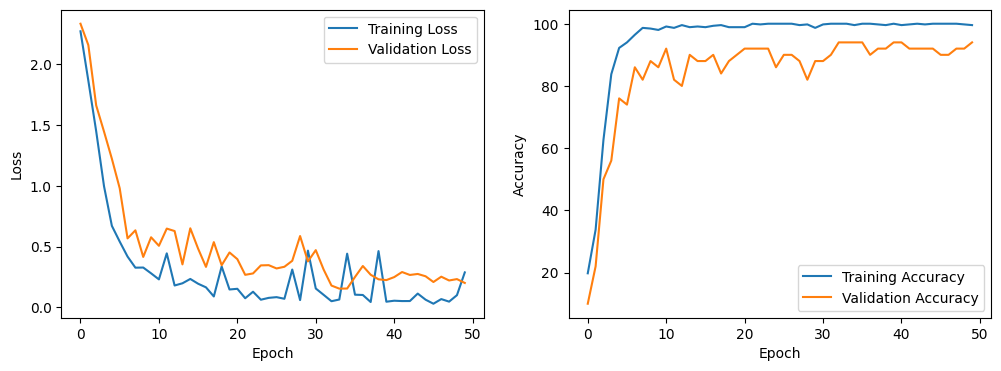

In [10]:
# Initialize the ResNet model and move it to the GPU if available
resnet = ResNet(num_classes=10).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# Initialize lists to hold the losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Initialize the patience and the counter for early stopping
# add early stopping to prevent overfitting during model training
patience = 30
early_stopping_counter = 0

# Initialize the minimum validation loss to a large value
min_val_loss = float('inf')

# Train the model
epochs = 50
for epoch in range(epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0
    resnet.train()  # Set the model to training mode
    for inputs, labels in trainloader:
        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted_train = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted_train.eq(labels).sum().item()
    else:
        # Save the loss and accuracy for this epoch
        train_losses.append(running_loss/len(trainloader))
        train_accuracies.append(100 * correct_train / total_train)
        
        # Validation
        resnet.eval()  # Set the model to evaluation mode
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = resnet(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        val_loss /= len(valloader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Check if the validation loss is the lowest so far
        if val_loss < min_val_loss:
            # If so, save the model and update the minimum validation loss
            torch.save(resnet.state_dict(), 'best_model_ResNet.pth')
            min_val_loss = val_loss
            early_stopping_counter = 0
        else:
        # If not, increment the counter
            early_stopping_counter += 1
            print(f'EarlyStopping counter: {early_stopping_counter} out of {patience}')
            if early_stopping_counter >= patience:
                print('Early stopping')
                break  # Stop the training process

        # Print the loss and accuracy for this epoch in one line
        print(f"Epoch {epoch+1}/{epochs} | Training loss: {running_loss/len(trainloader)} | Validation loss: {val_loss} | Training accuracy: {100 * correct_train / total_train}% | Validation accuracy: {val_accuracy}%")

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# Load the best model
resnet.load_state_dict(torch.load('best_model_ResNet.pth'))

resnet.eval()  # Set the model to evaluation mode

correct = 0
total = 0

# No need to track gradients for validation, saves memory and computations
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 95 %


In [14]:
# 得到每一个类别的准确率

resnet.load_state_dict(torch.load('best_model_ResNet.pth'))

# Set the model to evaluation mode
resnet.eval()

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# No need to track gradients for validation, saves memory and computations
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    if class_total[i] != 0:
        print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))
    else:
        print('Accuracy of %5s : N/A' % i)


Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 100 %
Accuracy of     3 : 100 %
Accuracy of     4 : 88 %
Accuracy of     5 : 100 %
Accuracy of     6 : 100 %
Accuracy of     7 : 100 %
Accuracy of     8 : 100 %
Accuracy of     9 : 100 %
